<a href="https://colab.research.google.com/github/Bhavini30/IBP-Assigment-2/blob/main/Buisness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [1]:
#running wget to download  enron on google colab
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-28 06:48:22--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-28 06:48:23--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  64.3MB/s    in 18s     

2023-05-28 06:48:42 (44.

**Establishing connection to Enron database with sqlite library**

In [2]:
#importing sqlite3 library
import sqlite3

In [3]:
#Establishing connection with database
conn=sqlite3.connect("enron.db")

In [4]:
#Creating a cursor object
cur=conn.cursor()

**Checking the Database Schema**

In [5]:
#sql query to check the schema of database
sql="""
SELECT name
FROM sqlite_master
WHERE type = 'table';
"""
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [6]:
#sql query to check schema of table:employeelist
sql= """
PRAGMA table_info('employeelist');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [7]:
#sql query to check schema of table:message
sql= """
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [8]:
#sql query to check schema of table:reciepientinfo
sql= """
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [9]:
#sql query to check schema of table:referenceinfo
sql= """
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [10]:
#Import pandas to help translate the table into a dataframe 
import pandas as pd


In [11]:
#check format of date field in Message table
sql="""
SELECT date 
FROM message
"""
cur.execute(sql)
cur.fetchone()

('2000-01-21 04:51:00',)

In [12]:
#writing an sql query to fetch records from the message table and creating A Dataframe
sql="""
SELECT * from message;
"""
message_df=pd.read_sql_query(sql,conn)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [13]:
#Checking for null values in the message_df
message_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mid         252759 non-null  int64 
 1   sender      252759 non-null  object
 2   date        252759 non-null  object
 3   message_id  252759 non-null  object
 4   subject     252759 non-null  object
 5   body        252759 non-null  object
 6   folder      252759 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.5+ MB


Since no null values were found,there is no need to clean the data before analysing it.

**Analysis and Visualisation of Enron Communication and Organisational Structure**

**Email Traffic Over Time**

In [14]:
#writing an sql query to count number of emails per day
sql="""
SELECT strftime('%Y-%m-%d', date) AS day , COUNT(*) AS email_count 
FROM message
GROUP by day
"""
cur.execute(sql)
#store the data in the result variable
results = cur.fetchall()

In [15]:
#Converting data in a DataFrame
day_df = pd.DataFrame(results, columns=['day','email_count'])

In [16]:
#Displaying the Dataframe
day_df

,day,email_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


In [17]:
#importing pandas and matplotlib to plot the line graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

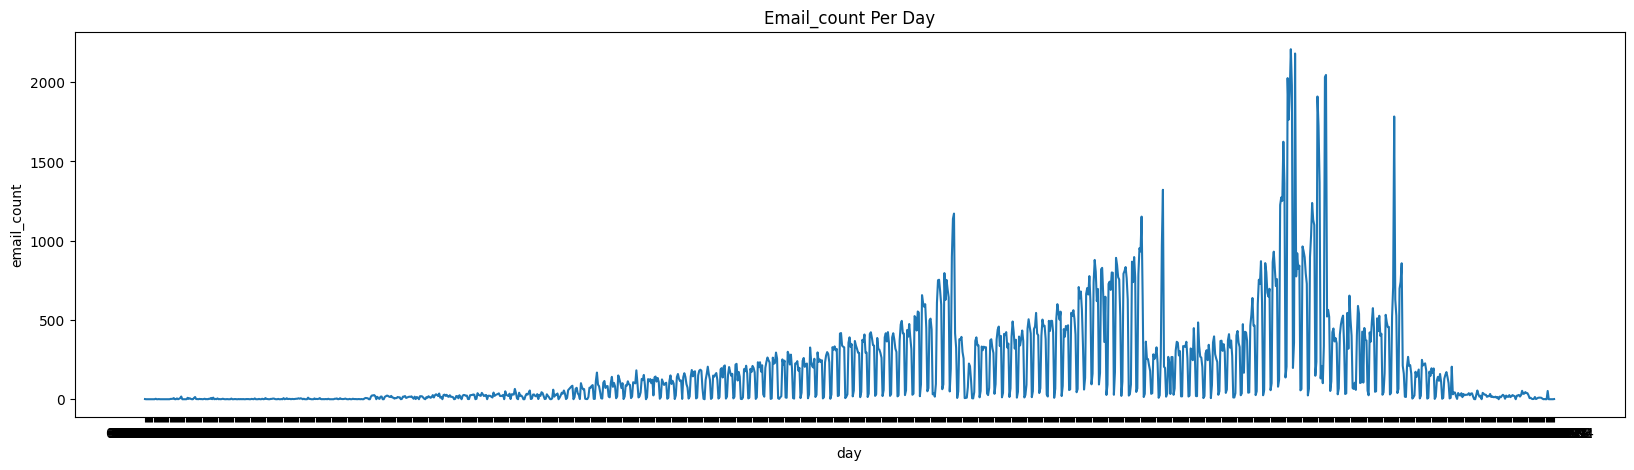

In [18]:
#plotting the line graph
fig= plt.subplots(figsize=(20,5))
sns.lineplot(data = day_df,x="day",y="email_count")
plt.title('Email_count Per Day')
plt.show()



**Analysis for Email_count Per Day**

The code for the graph (fig= plt.subplots(figsize=(20,5)) has created a figure with a single sublot with dimension of 20 for the x-axis and dimension 5 for the y-axis.The code for the graph(sns.lineplot(data = day_df,x="day",y="email_count") has used the data from the day_df Dataframe to plot the graph and has use the values of day for the x-axis and the values of email_count for the y axis.

From the graph, it can be noted that the number of emails is increasing as each day passes, and the highest number of emails for a day is over 2000 emails.
the values of the graph keep on fluctuating.since there are a lot of values for the x-axis the values for day are not displayed properly making it difficult to draw accurate analysis.

In [19]:
#writing an sql query to count number of emails per month
sql="""
SELECT strftime('%Y-%m', date) AS month , COUNT(*) AS email_count 
FROM message
GROUP by month
"""
cur.execute(sql)
results = cur.fetchall()

In [20]:
#Convert data in a Dataframe
month_df = pd.DataFrame(results, columns=['month','email_count'])

In [21]:
#Displaying the DataFrame
month_df

,month,email_count
0,0001-05,2
1,0001-06,1
2,0001-07,1
3,0001-08,12
4,0001-09,9
...,...,...
63,2004-02,53
64,2007-02,1
65,2020-12,2
66,2043-12,1


In [22]:
#importing pandas and matplotlib to plot the line graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

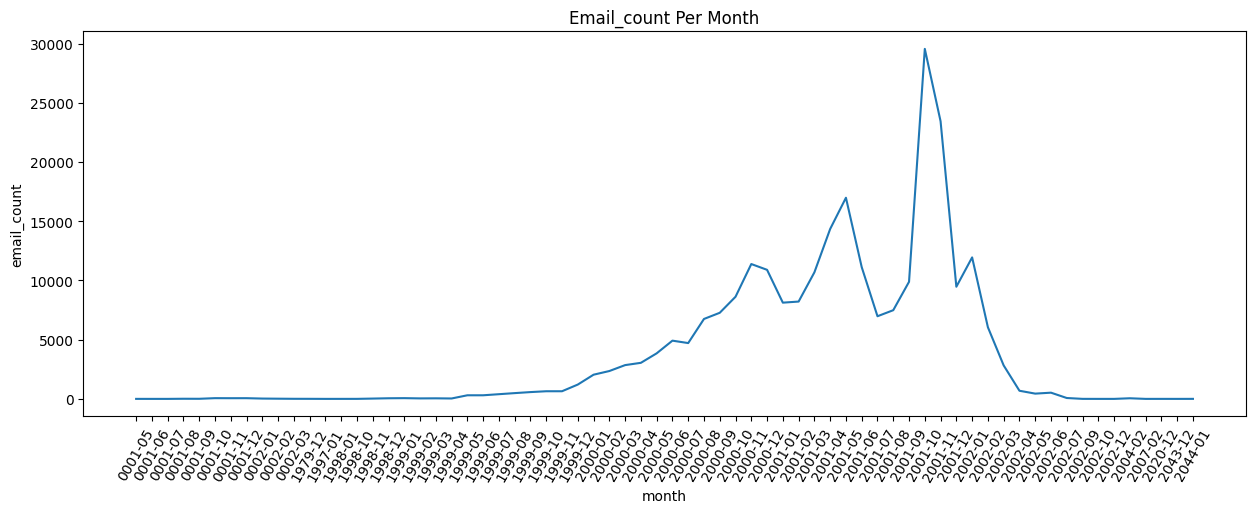

In [23]:
#plotting the line graph
fig= plt.subplots(figsize=(15,5))
sns.lineplot(data = month_df,x="month",y="email_count")
plt.xticks(rotation= 60)
plt.title("Email_count Per Month")
plt.show()

**Analysis for Email_count Per month**

From the code (fig= plt.subplots(figsize=(15,5)),a graph with a single subplot is created and its has set the dimension for the x-axis at 15 and the dimension of the y-axis at 5.The code for the graph(sns.lineplot(data = month_df,x="day",y="email_count") has used the data from the month_df Dataframe to plot the graph and has use the values of month for the x-axis and the values of email_count for the y axis. The code (plt.xticks(rotation=60)) makes the values of the x-axis to rotate at an angle of 60 degree making the data more visible on the graph .Hence,Analysis can be performed more easily.

 It can be noted that the email count increases constantly at first and then has a steep increase and then start to decrease towards the end.The maximun value for the email_count per month is over 30000.

In [24]:
#writing an sql query to count number of emails per week
sql="""
SELECT strftime('%Y-%w', date) AS week , COUNT(*) AS email_count 
FROM message
GROUP by week
"""
cur.execute(sql)
results = cur.fetchall()

In [25]:
#Convert data into Dataframe for the query
week_df = pd.DataFrame(results, columns=['week','email_count'])

In [26]:
#Displaying the DataFrame
week_df

,week,email_count
0,0001-0,4
1,0001-1,72
2,0001-2,39
3,0001-3,27
4,0001-4,31
5,0001-5,31
6,0001-6,1
7,0002-1,9
8,0002-2,14
9,0002-3,6


In [27]:
#using matplotlib  and pandas to perform visualisation of data
import pandas as pd
import matplotlib.pyplot as plt  

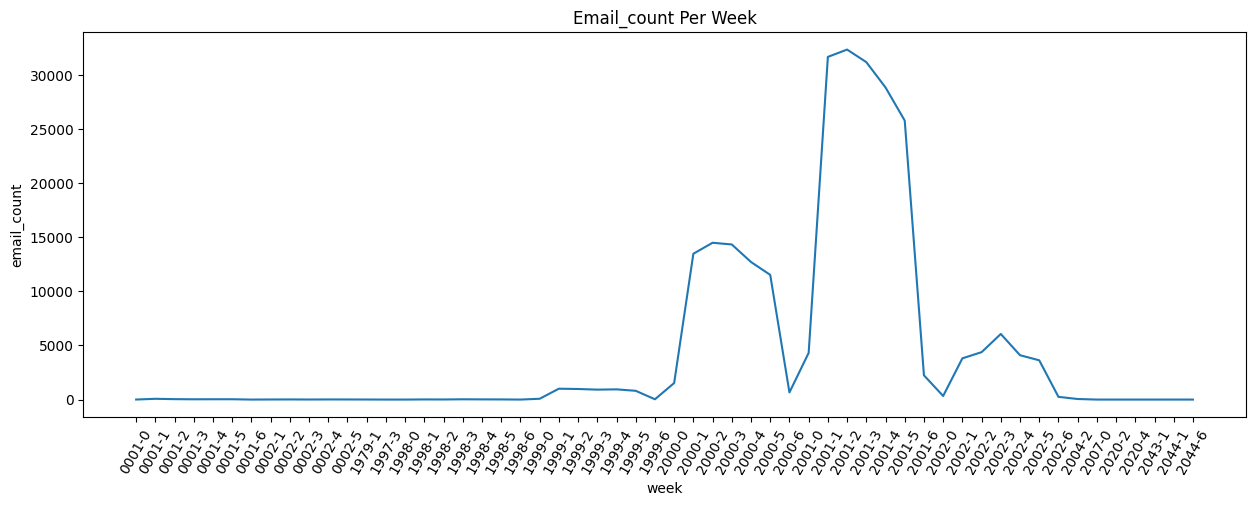

In [28]:
#plotting the line graph
fig= plt.subplots(figsize=(15,5))
sns.lineplot(data = week_df,x="week",y="email_count")
plt.xticks(rotation= 60)
plt.title('Email_count Per Week')
plt.show()

**Analysis of Email_count per week**

The code for the graph (fig= plt.subplots(figsize=(15,5)),creates a figure with a single subplot and sets the dimension of 15 for the x-axis and the dimension of 5 for the y-axis.The code for the graph(sns.lineplot(data = week_df,x="week",y="email_count") has used the data from the week_df Dataframe to plot the graph and has use the values of week for the x-axis and the values of email_count for the y axis. The code (plt.xticks(rotation=60)) makes the values of the x-axis to rotate at an angle of 60 degree making the data more visible on the graph .Hence,Analysis can be performed more easily.

 From the graph it can be noted that for the first few weeks the number of emails remain contant and then it has started to increase and decrease steeply ,the maximun number of emails per week is over 30000.

**Top Senders and Recipients**

In [29]:
#Sql query to find sender with highest email count
sender_query = '''
    SELECT sender, COUNT(*) AS sender_email_count
    FROM (
        SELECT sender
        FROM Message m
        ) AS sender_subquery
    GROUP BY sender
    ORDER BY sender_email_count DESC
    LIMIT 10
    ;
'''
#Convert data into DataFrame 
sender_df = pd.read_sql_query(sender_query,conn)

#display DataFrame
sender_df


,sender,sender_email_count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


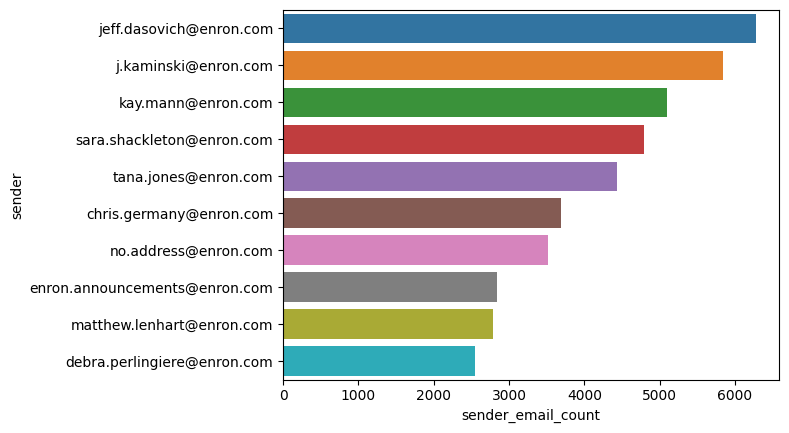

In [30]:
#ploting a barchart
data= sender_df
sns.barplot(data= data, y="sender", x= "sender_email_count")
plt.show()


**Analysis For the Bar Chart**

From the code(sns.barplot(data= data, y="sender", x= "sender_email_count"),we can see that the values inside variable data has been used to plot the Barchart, and the values for  sender_email_count has been used for the x-axis and the values of sender has been used for the y-axis.

From the bar chart, we can derive the jeff.dasovich@enron.com is the sender with the highest sender_email_count of 6000 and debra.perlingiere@enron.com is the sender with the lowest sender_email_count of approximately 2500.

In [31]:
#sql query to find recipient with highest email count
recipient_query = '''
    SELECT rvalue, COUNT(*) AS recipient_email_count
    FROM recipientinfo
    GROUP BY rvalue
    ORDER BY recipient_email_count DESC
    LIMIT 10
  ;
'''

#Converting data to DataFrame
recipient_df = pd.read_sql_query(recipient_query, conn)

#display the DataFrame
recipient_df


,rvalue,recipient_email_count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


<Axes: xlabel='recipient_email_count', ylabel='rvalue'>

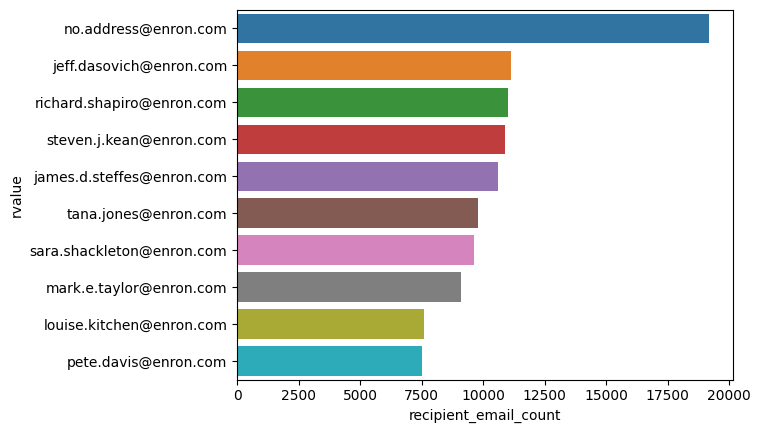

In [32]:
#ploting a barchart
data= recipient_df
sns.barplot(data= data, y="rvalue", x= "recipient_email_count")

**Analysis For the Bar Chart**

From the code(sns.barplot(data= data, y="rvalue", x= "recipient_email_count"),we can see that the values inside variable data has been used to plot the Barchart, and the values for  recipient_email_count has been used for the x-axis and the values of rvalue has been used for the y-axis.

From the recepient_email_Count it can be noticed tht no.address@enron.com has the highest count of over 17500 and louise.kitchen@enron.com and pete.davis@enron.com has the lowest count of email of 7500




**Email Distribution by Recipient Type**

In [33]:
#sql queryto retrieve reciepient types and their count
recipient_type_query = """
SELECT rtype ,count(*) As recipient_type_count
FROM recipientinfo
GROUP BY rtype
ORDER By rtype 
"""

In [34]:
#Converting data to Dataframe
type_df =pd.read_sql_query(recipient_type_query,conn)
#Displaying the Dataframe
type_df 

,rtype,recipient_type_count
0,BCC,253713
1,CC,253735
2,TO,1556994


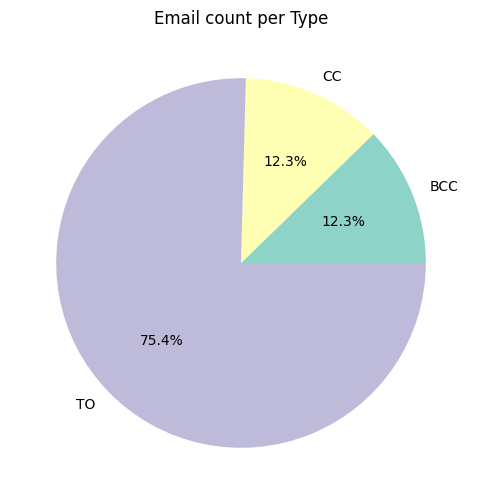

In [35]:
#plotting a piechart
plt.figure(figsize=(8,6))
plt.pie(data=type_df,x='recipient_type_count',labels='rtype',autopct='%.1f%%',colors = sns.color_palette('Set3'))
plt.title('Email count per Type')

#Displaying Piechart
plt.show()


**Analysis of the email count per type piechart**


From the piechart above we can deduce that the majoirity of emails belong to the "To" type with a percentage of 75.4% and the the "CC" type and "BCC" type have the the same percentage of 12.3%.

In [36]:
#closing the connection with the Database
conn.commit()
conn.close()

**Conclusion**

In this business report, we first downloaded the Enron database in the notebook using the!wget function and imported the sqlite3 library. Then we establish a connection between Enron.db and the sqlite3 library. Then we created a cursor object to execute the SQL queries. Secondly, we checked the schema of the tables present in the Database we were going to use for the analysis. After checking the schema of the tables, we imported the pandas library to help us convert the table data into Dataframe. We then check the Dataframe for null values. Since no null values were found, we did not need to clean the DataFrame. Finally, use SQL queries to fetch the data needed for each part of the analysis. Then we converted the query results into their respective DataFrame, which we then used to plot the different graphs.

While analysing the data which the different types of graphs, we found that the bar chart was the most effective method that displayed the results more clearly and was easier to derive analysis from; the graph that was not able to display useful information consisted were day against email_count graph as there were too many values to interpret.
